# Smart City Traffic Patterns

# Importing Libraries

In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings  
warnings.filterwarnings("ignore")  

In [263]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

5.15.0


In [264]:
import tensorflow
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

# Data Collection

In [265]:
#data collection

In [266]:
data=pd.read_csv('train_aWnotuB.csv')

In [267]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


# Data Preprocessing

In [268]:
data.drop(columns=['ID'],inplace=True)

In [269]:
data.head()

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9


In [270]:
data.pivot_table(index="Junction",values="Vehicles")

,Vehicles
Junction,
1,45.052906
2,14.253221
3,13.694010
4,7.251611


# Data Cleaning

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [272]:
data.isna().sum()

DateTime    0
Junction    0
Vehicles    0
dtype: int64

In [273]:
data.dropna(inplace=True)

In [274]:
data.describe()

,Junction,Vehicles
count,48120.000000,48120.000000
mean,2.180549,22.791334
std,0.966955,20.750063
min,1.000000,1.000000
25%,1.000000,9.000000
50%,2.000000,15.000000
75%,3.000000,29.000000
max,4.000000,180.000000


# Feature Engineering

Converting the DateTime to required formats

In [275]:
#converting to required datetime format

data['DateTime']=pd.to_datetime(data['DateTime'])
data['Year'] = data['DateTime'].apply(lambda time: time.year)
data['Month'] = data['DateTime'].apply(lambda time: time.month)
data['Day']=data['DateTime'].apply(lambda time: time.day)
data['Day of Week'] = data['DateTime'].apply(lambda time: time.dayofweek)
data['hour'] = data['DateTime'].apply(lambda time: time.hour)


In [276]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

In [277]:
tmap={'Mon':'WORKDAY','Tue':'WORKDAY','Wed':'WORKDAY','Thu':'WORKDAY','Fri':'WORKDAY','Sat':'HOLIDAY','Sun':'HOLIDAY'}
data['W/H']=data['Day of Week'].map(tmap)

In [278]:
data.head()

,DateTime,Junction,Vehicles,Year,Month,Day,Day of Week,hour,W/H
0,2015-11-01 00:00:00,1,15,2015,11,1,Sun,0,HOLIDAY
1,2015-11-01 01:00:00,1,13,2015,11,1,Sun,1,HOLIDAY
2,2015-11-01 02:00:00,1,10,2015,11,1,Sun,2,HOLIDAY
3,2015-11-01 03:00:00,1,7,2015,11,1,Sun,3,HOLIDAY
4,2015-11-01 04:00:00,1,9,2015,11,1,Sun,4,HOLIDAY


In [279]:
#divide the data according to year

newdata_2015=data[data['Year']==2015]
newdata_2016=data[data['Year']==2016]
newdata_2017=data[data['Year']==2017]

# data visualization

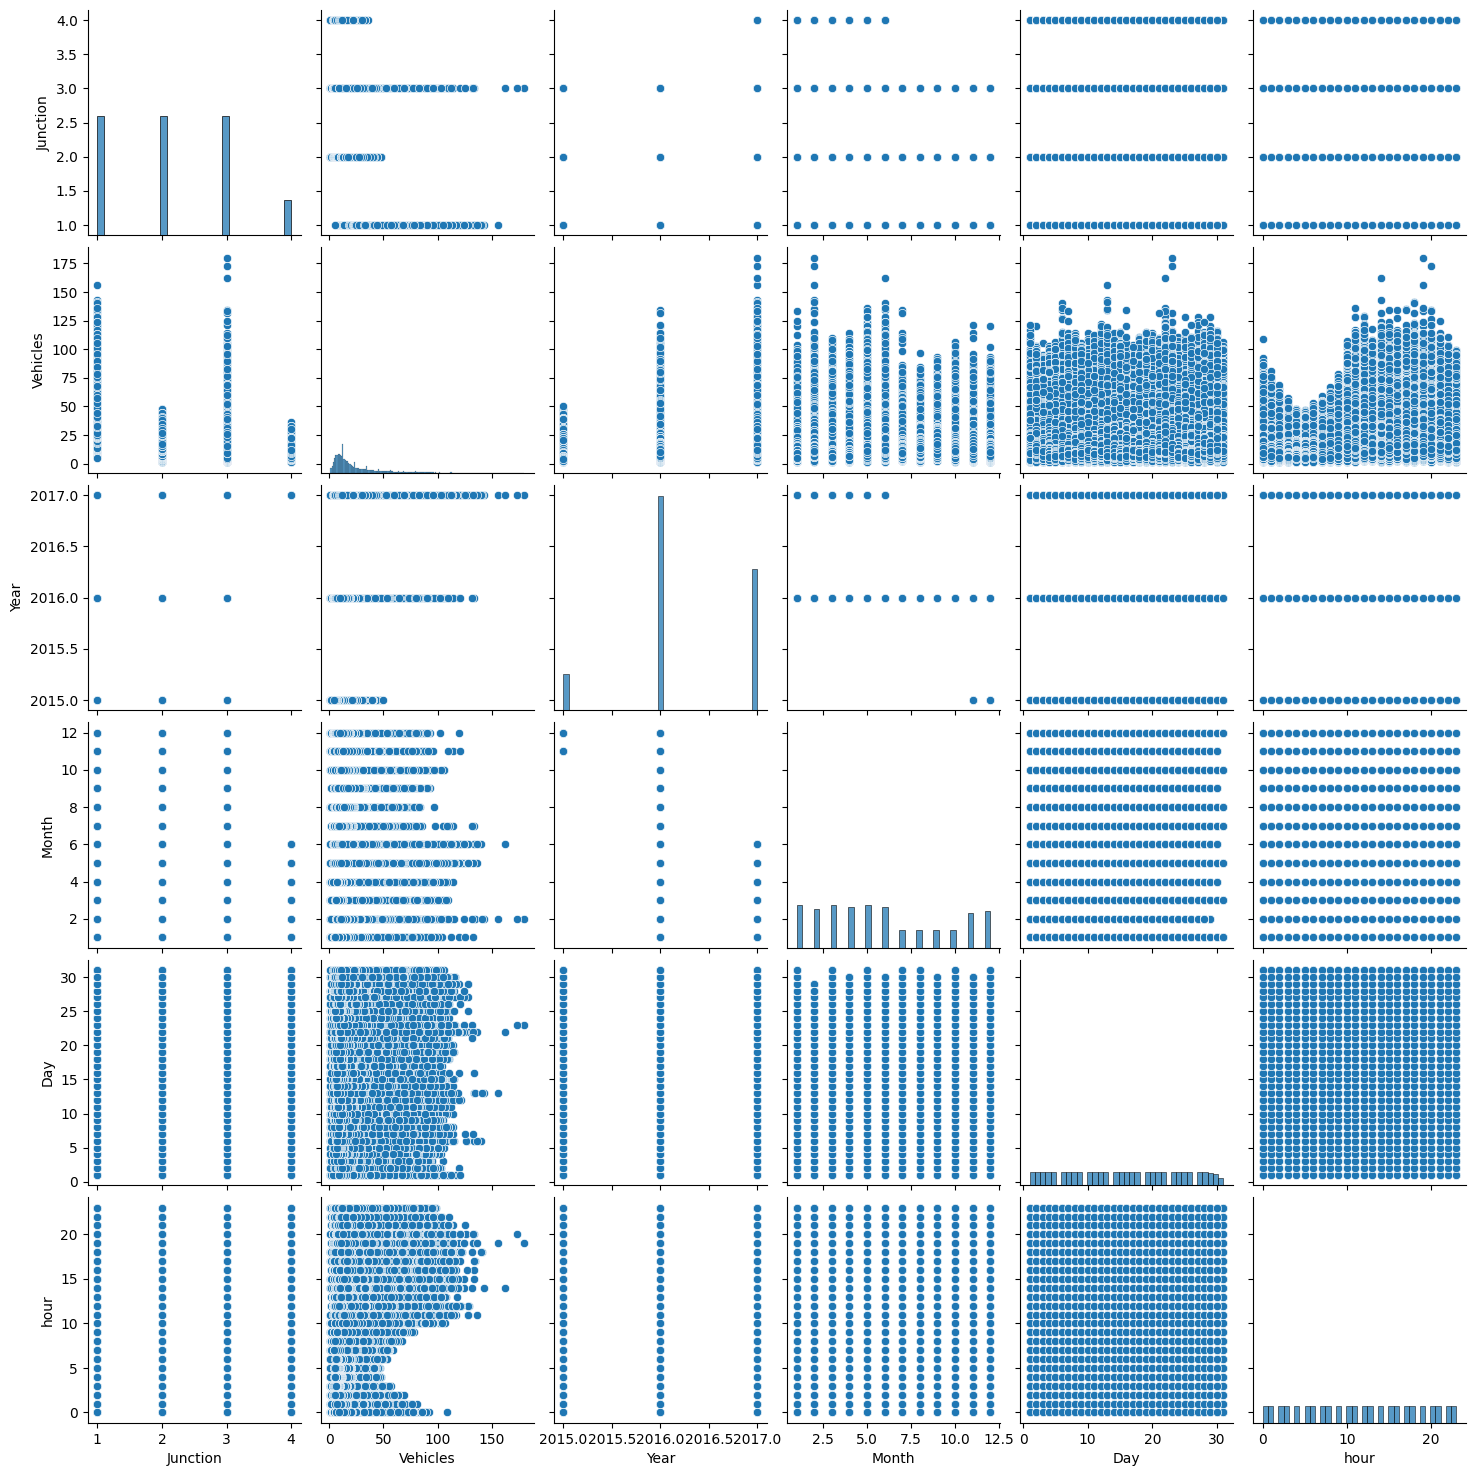

In [280]:
sns.pairplot(data,palette='coolwarm')

<Axes: xlabel='Junction', ylabel='Vehicles'>

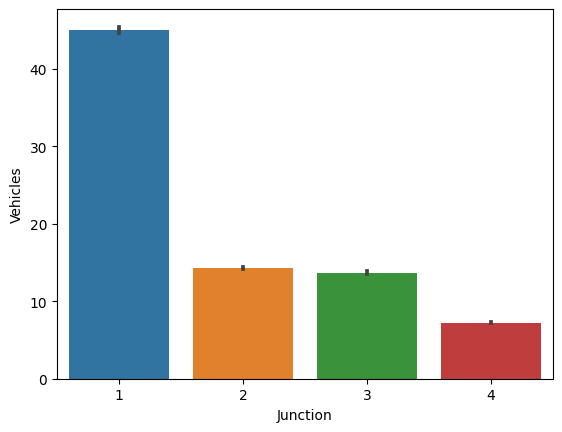

In [281]:
#Junction vs Vehicles(overall data)

sns.barplot(x='Junction',y='Vehicles',data=data)

<Axes: xlabel='hour', ylabel='Vehicles'>

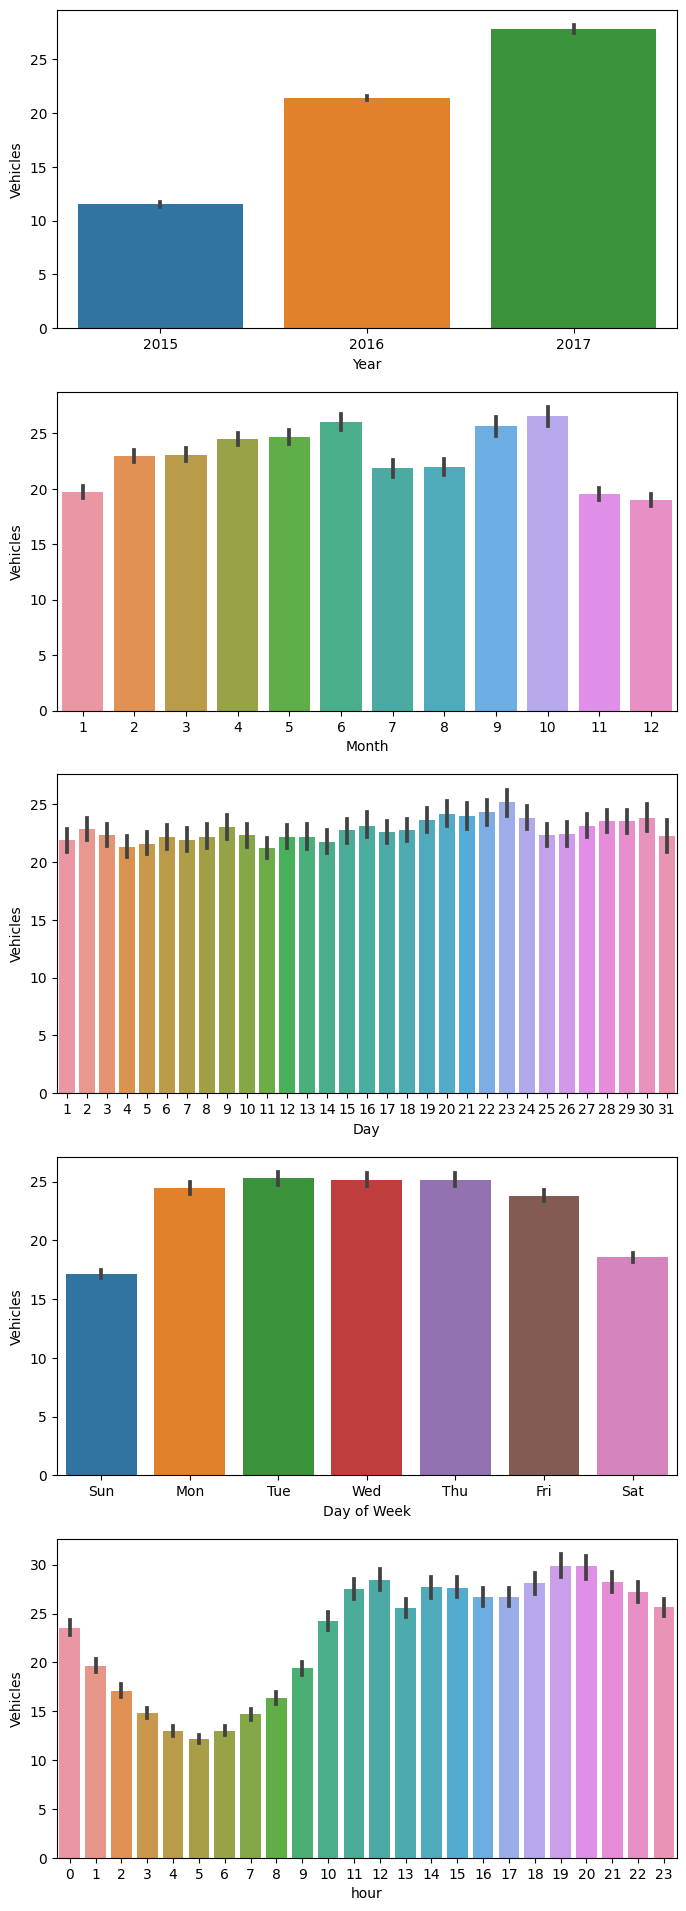

In [282]:
# date(year,month,day,dayofweek,hour)

plt.figure(figsize=(8,24))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',data=data)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',data=data)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',data=data)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',data=data)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',data=data)

<Axes: xlabel='hour', ylabel='Vehicles'>

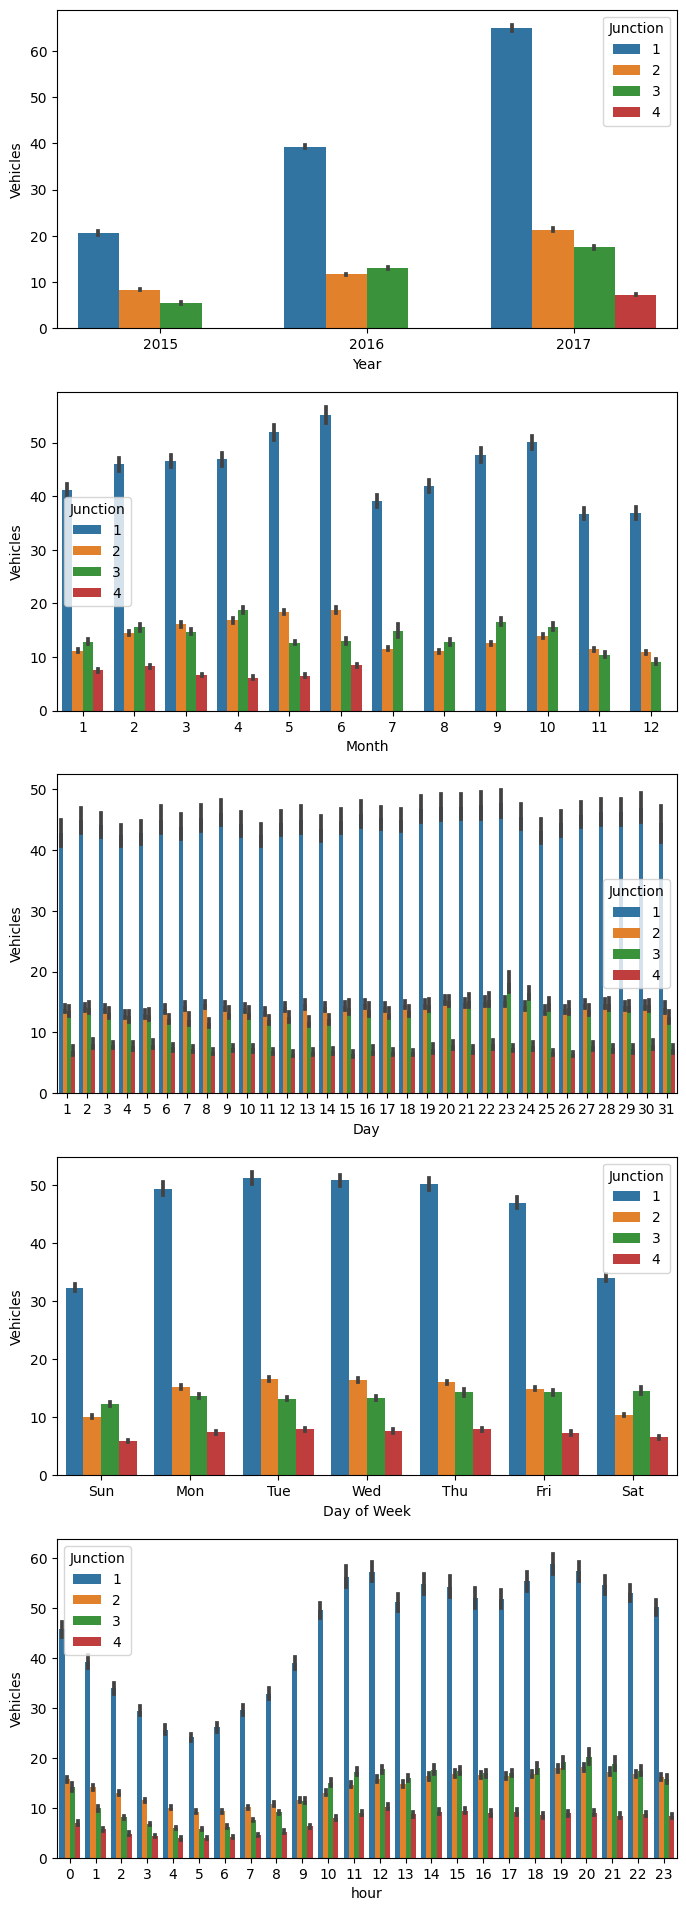

In [283]:
# date(year,month,day,dayofweek,hour) vs vehicles {overall data}

plt.figure(figsize=(8,24))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',hue='Junction',data=data)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',hue='Junction',data=data)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',hue='Junction',data=data)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',hue='Junction',data=data)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',hue='Junction',data=data)

<Axes: xlabel='W/H', ylabel='Vehicles'>

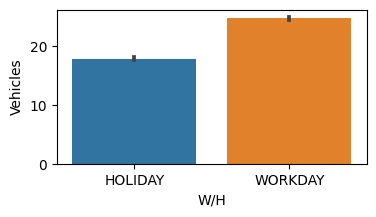

In [284]:
#vehicles vs typeofdays {overalldata}
plt.figure(figsize=(4,2))
sns.barplot(x='W/H',y='Vehicles',data=data)

<Axes: xlabel='W/H', ylabel='Vehicles'>

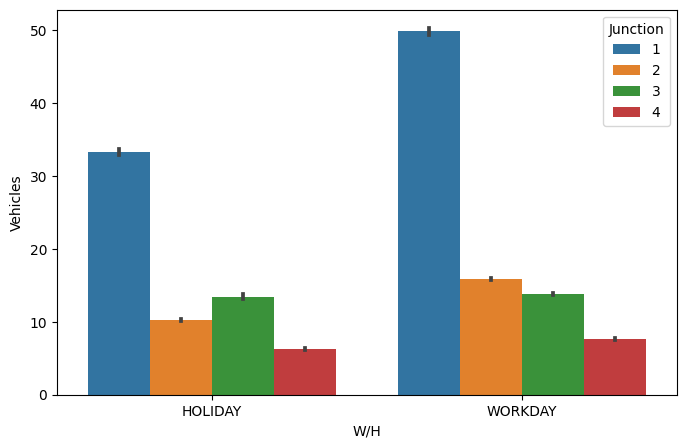

In [285]:
#vehicles vs junction(typeofdays)  {overall data}
plt.figure(figsize=(8,5))
sns.barplot(x='W/H',y='Vehicles',hue='Junction',data=data)


<Axes: xlabel='hour', ylabel='Vehicles'>

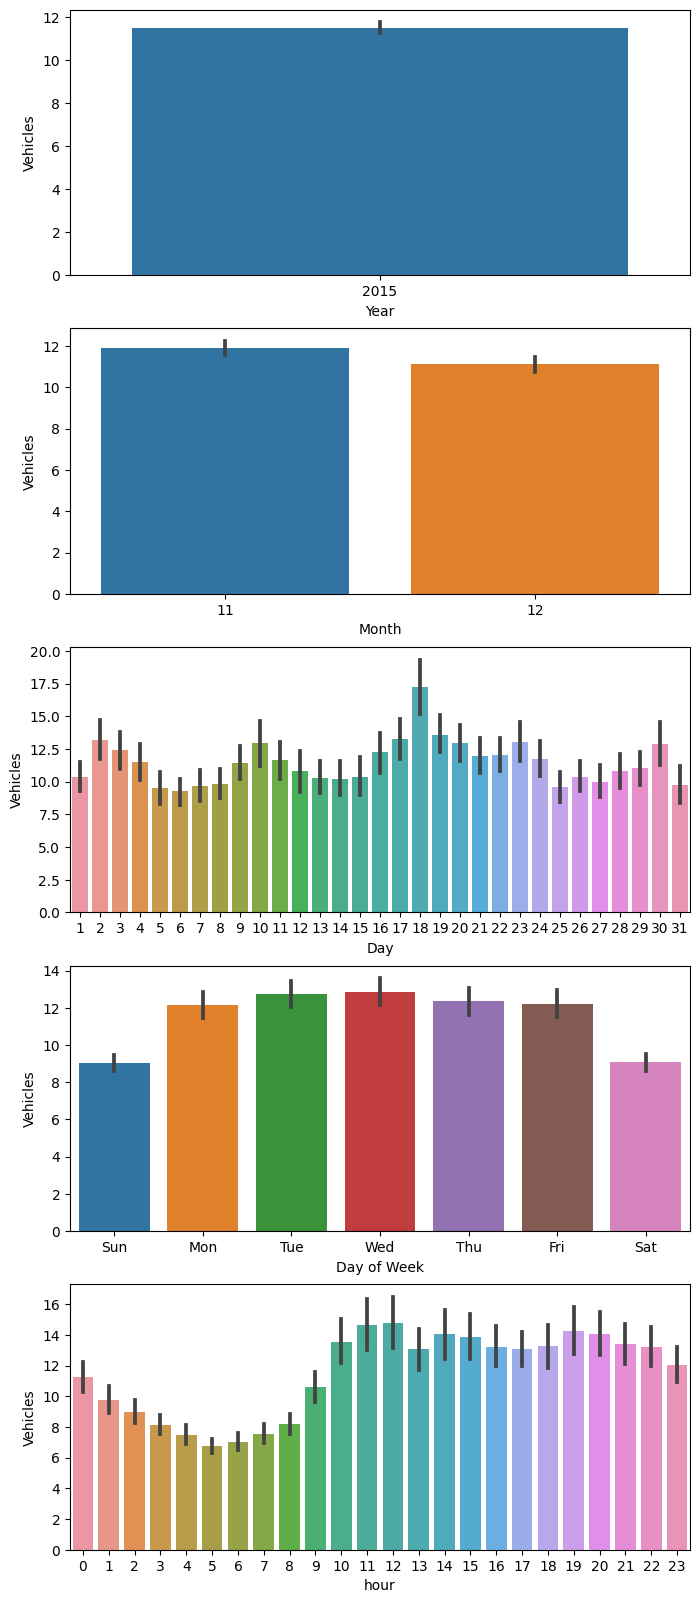

In [286]:
# date(year,month,day,dayofweek,hour) vs vehicles { data of year 2015}
plt.figure(figsize=(8,20))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',data=newdata_2015)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',data=newdata_2015)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',data=newdata_2015)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',data=newdata_2015)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',data=newdata_2015)

<Axes: xlabel='hour', ylabel='Vehicles'>

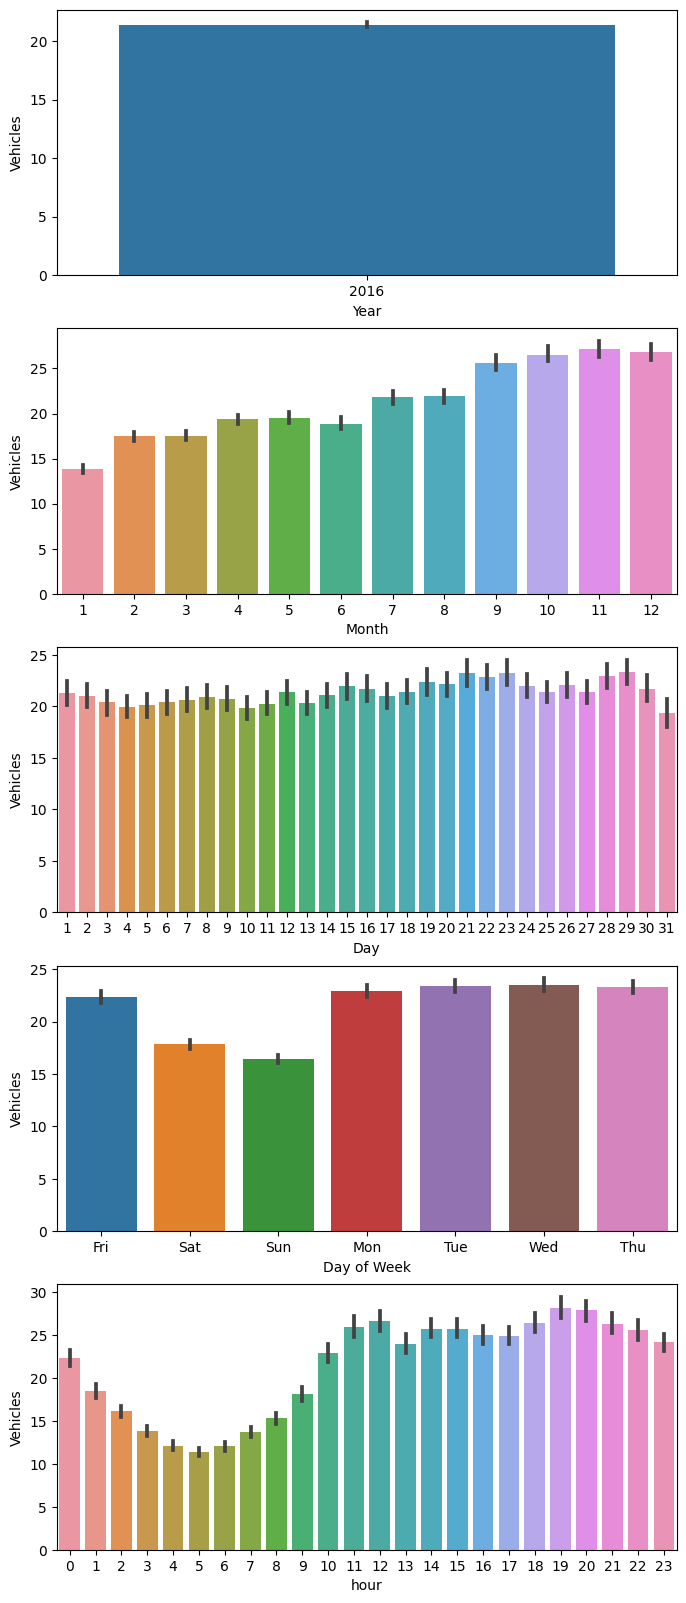

In [287]:
# date(year,month,day,dayofweek,hour) vs vehicles { data of year 2016}
plt.figure(figsize=(8,20))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',data=newdata_2016)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',data=newdata_2016)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',data=newdata_2016)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',data=newdata_2016)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',data=newdata_2016)

<Axes: xlabel='hour', ylabel='Vehicles'>

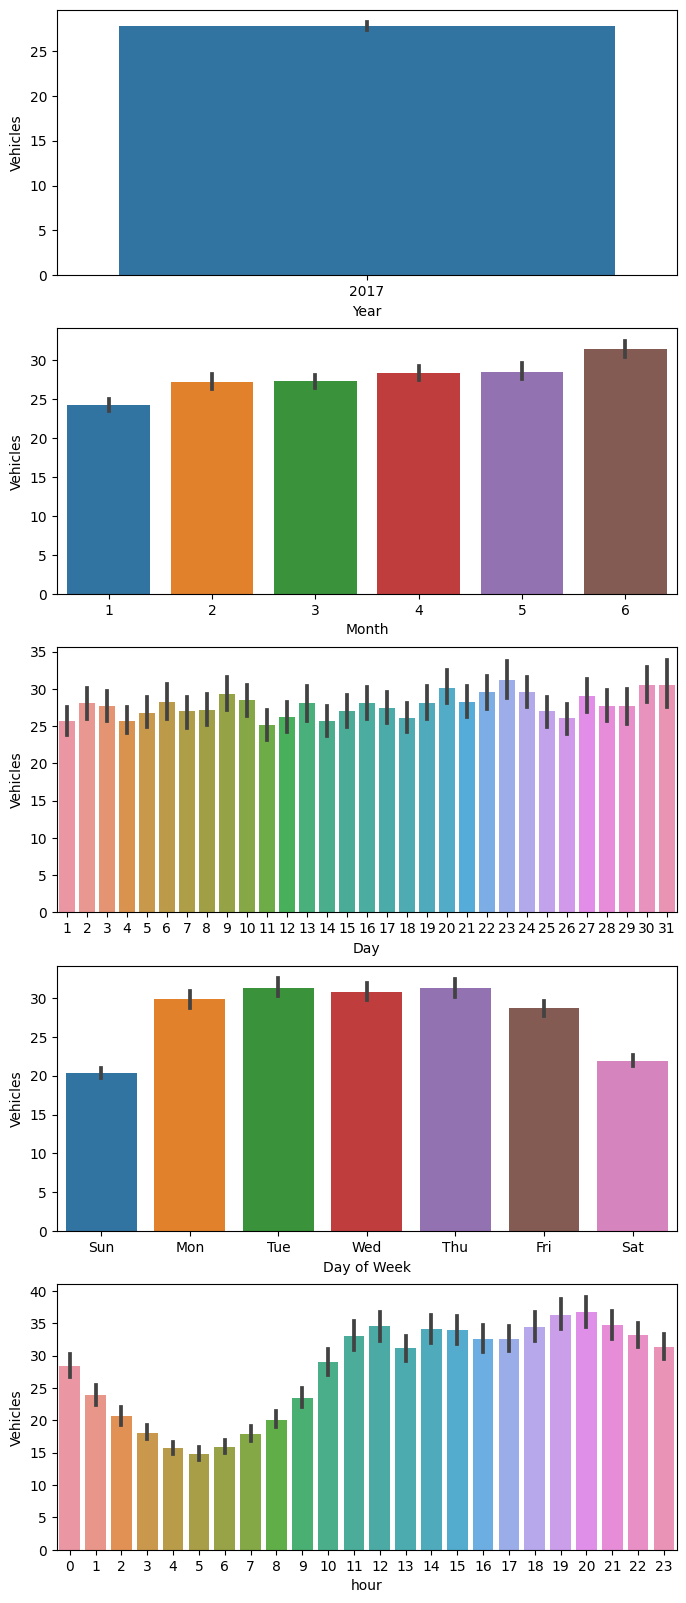

In [288]:
# date(year,month,day,dayofweek,hour) vs vehicles { data of year 2017}
plt.figure(figsize=(8,20))
plt.subplot(5,1,1)
sns.barplot(x='Year',y='Vehicles',data=newdata_2017)

plt.subplot(5,1,2)
sns.barplot(x='Month',y='Vehicles',data=newdata_2017)

plt.subplot(5,1,3)
sns.barplot(x='Day',y='Vehicles',data=newdata_2017)

plt.subplot(5,1,4)
sns.barplot(x='Day of Week',y='Vehicles',data=newdata_2017)

plt.subplot(5,1,5)
sns.barplot(x='hour',y='Vehicles',data=newdata_2017)

Text(0.5, 0, 'Date')

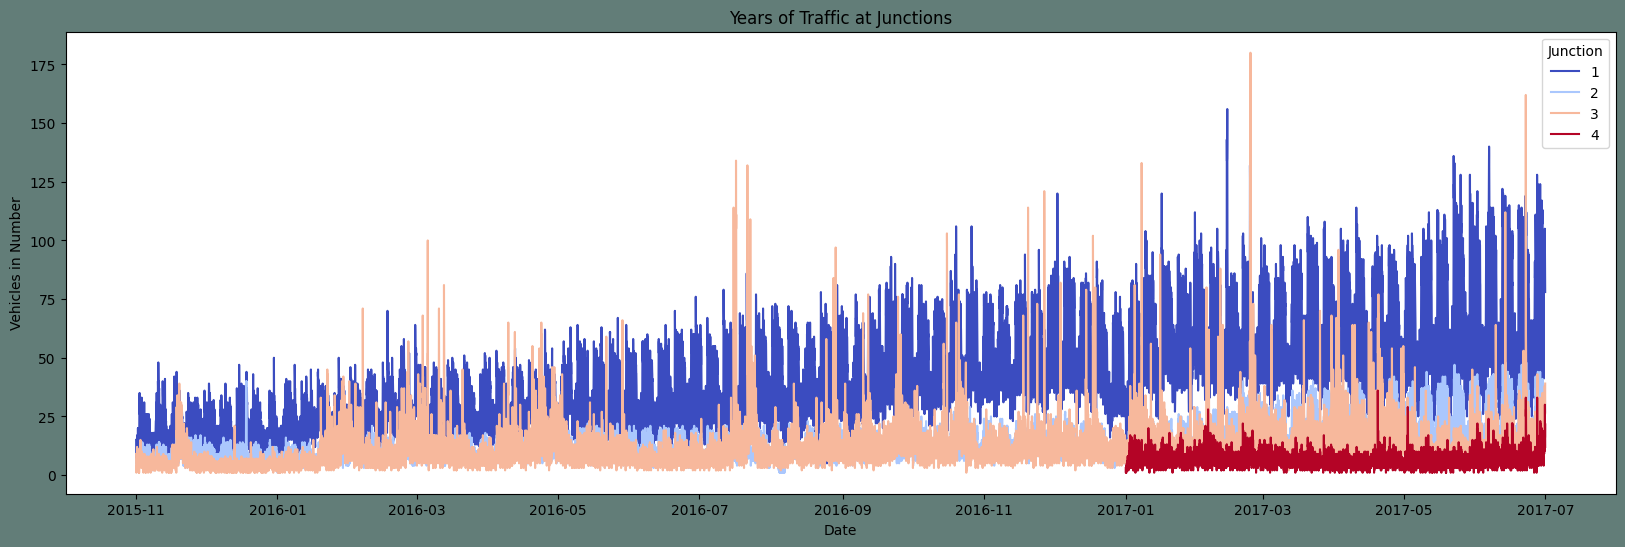

In [289]:
#timeseries plot of data
plt.figure(figsize=(20,6),facecolor="#627D78")  
Time_series=sns.lineplot(x=data['DateTime'],y="Vehicles",data=data, hue="Junction", palette='coolwarm')  
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date")  

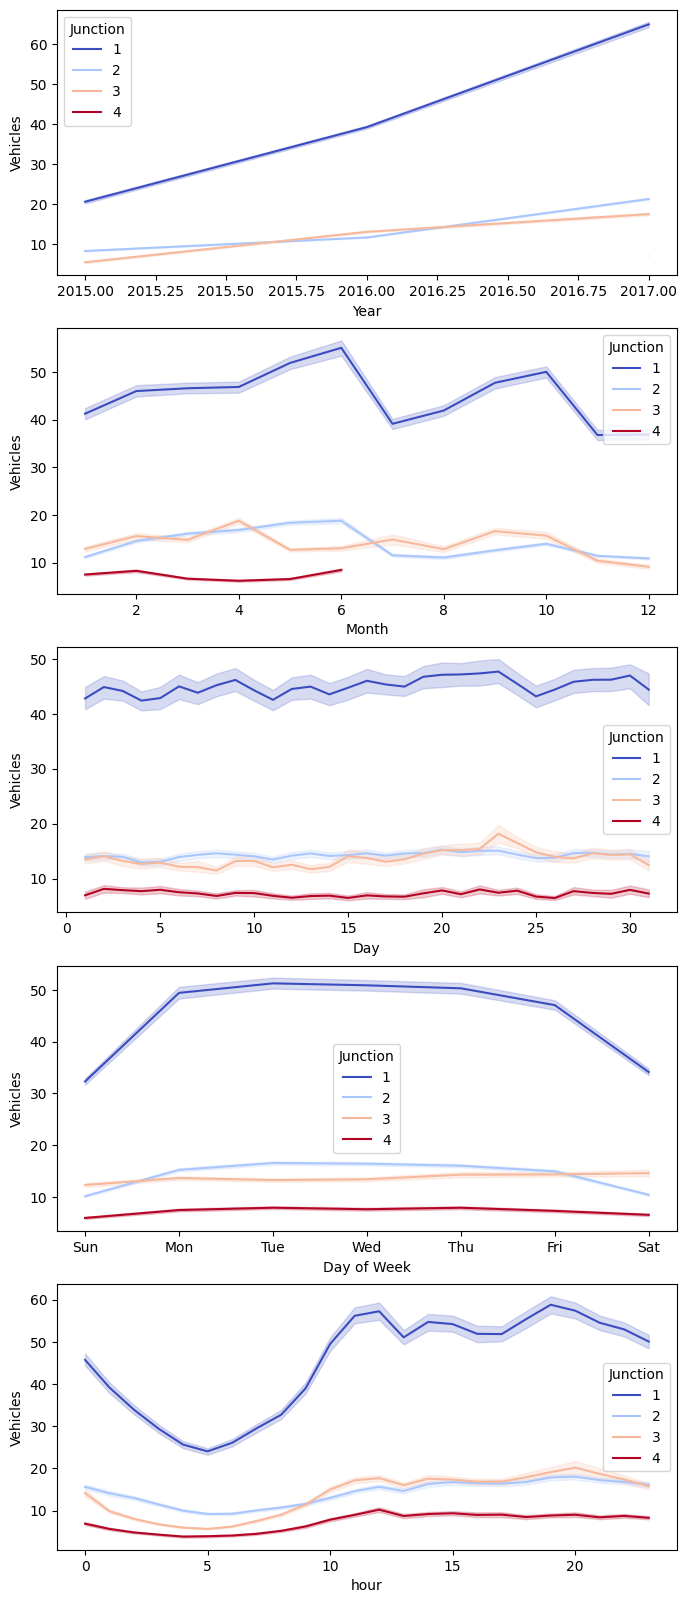

In [290]:
#Time series plot (Year , Month, Day,Day of Week,hour vs vehicles)
plt.figure(figsize=(8,20))
plt.subplot(5,1,1)
ax=sns.lineplot(x=data['Year'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )

plt.subplot(5,1,2)
ax=sns.lineplot(x=data['Month'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )

plt.subplot(5,1,3)
ax=sns.lineplot(x=data['Day'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )

plt.subplot(5,1,4)
ax=sns.lineplot(x=data['Day of Week'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )

plt.subplot(5,1,5)
ax=sns.lineplot(x=data['hour'],y="Vehicles",data=data, hue="Junction", palette='coolwarm' )


# Exploratory Data Analysis

In [291]:
#correlation matrix
data[['Junction', 'Vehicles', 'Year', 'Month','Day','hour']].corr()

,Junction,Vehicles,Year,Month,Day,hour
Junction,1.000000e+00,-0.613787,2.212977e-01,-1.242771e-01,-2.094621e-03,-2.132575e-15
Vehicles,-6.137872e-01,1.000000,2.212531e-01,-2.272345e-02,2.789498e-02,2.199377e-01
Year,2.212977e-01,0.221253,1.000000e+00,-6.234957e-01,-7.474779e-03,7.732006e-16
Month,-1.242771e-01,-0.022723,-6.234957e-01,1.000000e+00,9.154760e-03,4.953278e-16
Day,-2.094621e-03,0.027895,-7.474779e-03,9.154760e-03,1.000000e+00,-9.917806e-18
hour,-2.132575e-15,0.219938,7.732006e-16,4.953278e-16,-9.917806e-18,1.000000e+00


<Axes: >

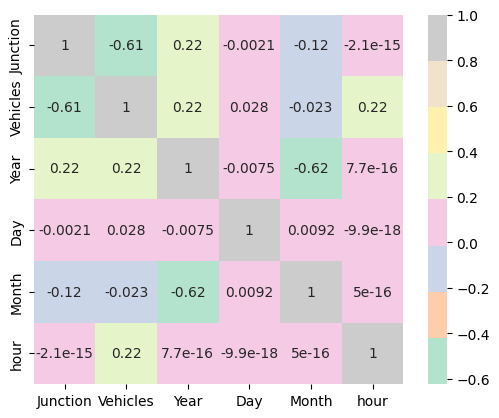

In [292]:
#heatmap
sns.heatmap(data[['Junction', 'Vehicles', 'Year','Day', 'Month','hour']].corr(),annot=True,cmap='Pastel2',square=True)

Text(0.5, 0, 'Date')

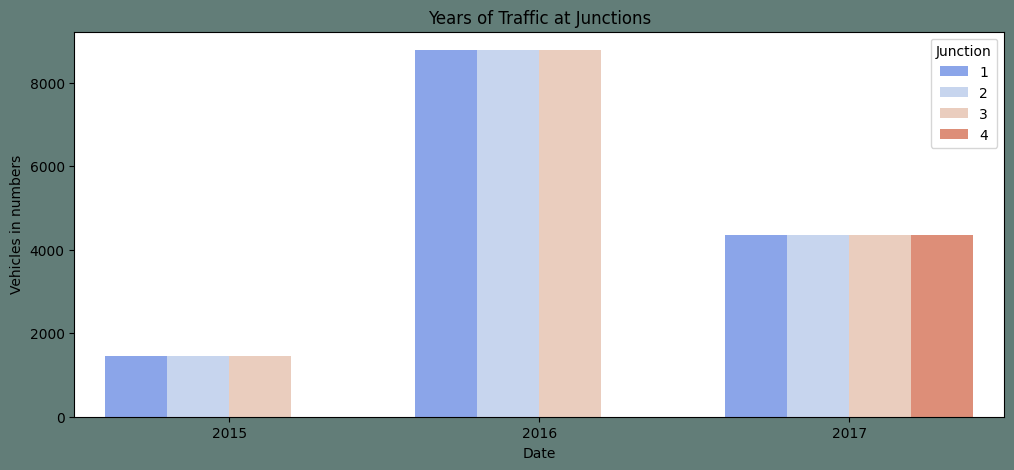

In [293]:
#countplot vehicles in year from given data

plt.figure(figsize=(12,5),facecolor="#627D78")  
count = sns.countplot(data=data, x =data["Year"], hue="Junction", palette='coolwarm')  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date")  

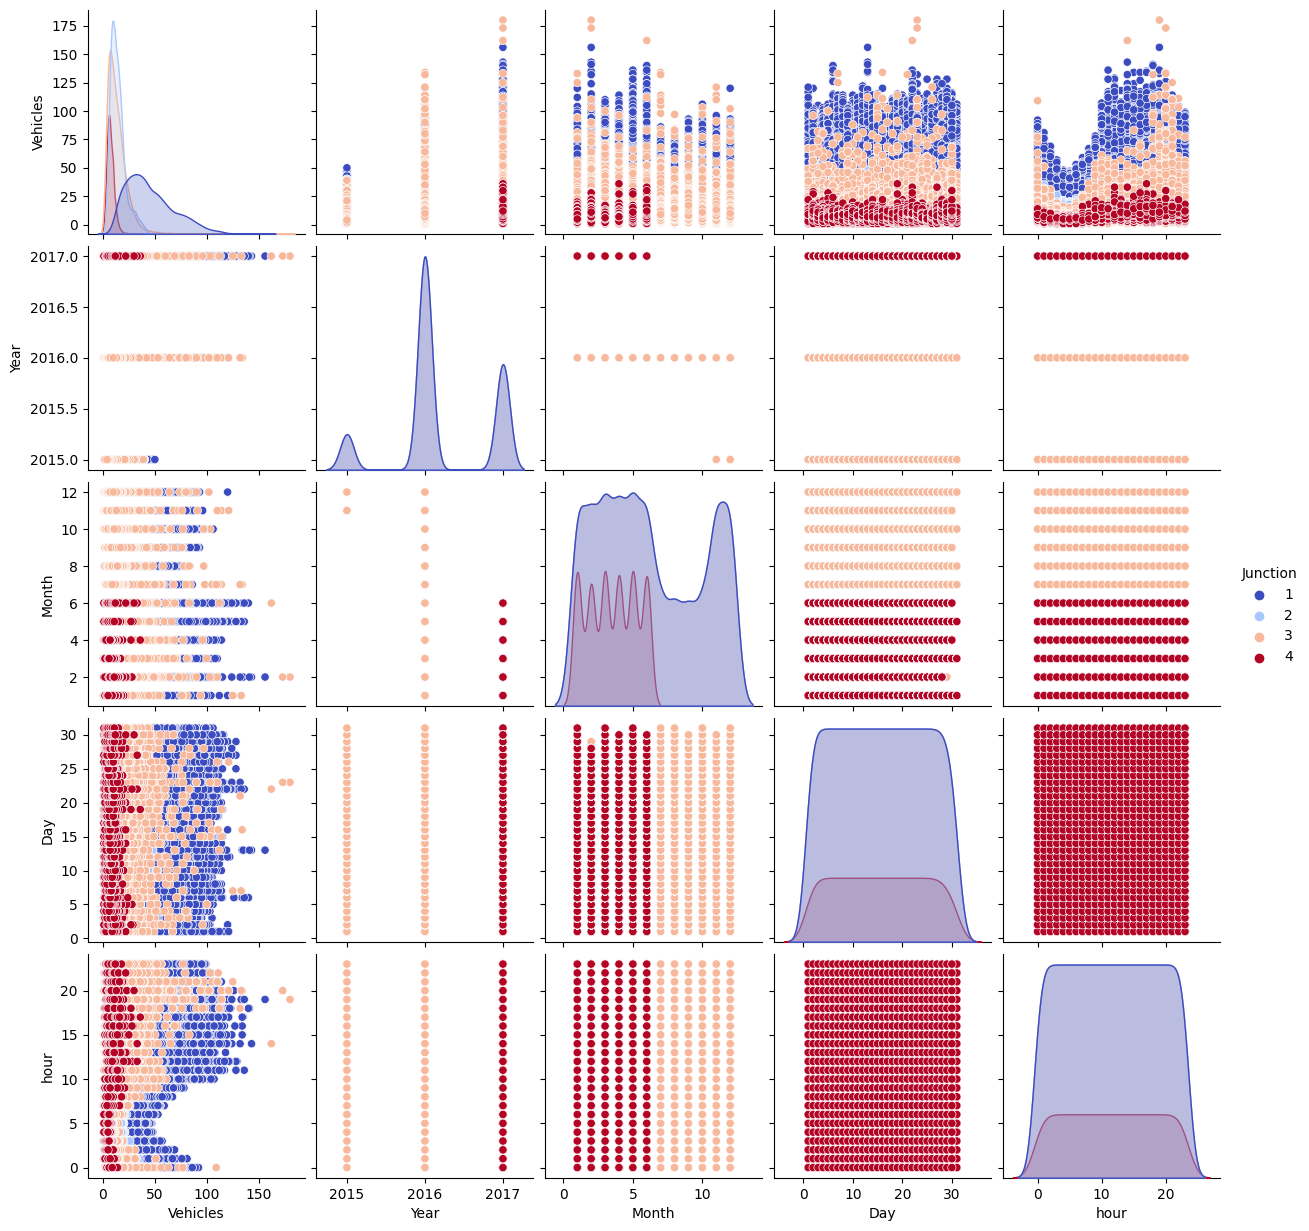

In [294]:
#pairplot of data (at each junctions)
sns.pairplot(data=data, hue= "Junction",palette='coolwarm')  


# Feature Engineering and EDA according to junction

In [295]:
data_junction = data.pivot(columns="Junction", index="DateTime",values='Vehicles')  

In [297]:
data_junction.head()

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN


In [298]:
data_junction.describe()

Junction,1,2,3,4
count,14592.000000,14592.000000,14592.000000,4344.000000
mean,45.052906,14.253221,13.694010,7.251611
std,23.008345,7.401307,10.436005,3.521455
min,5.000000,1.000000,1.000000,1.000000
25%,27.000000,9.000000,7.000000,5.000000
50%,40.000000,13.000000,11.000000,7.000000
75%,59.000000,17.000000,18.000000,9.000000
max,156.000000,48.000000,180.000000,36.000000


In [299]:
#creating dataframe of each junctions

dataframe_1 = data_junction[1]
dataframe_2 = data_junction[2]  
dataframe_3 = data_junction[3]  
dataframe_4 = data_junction[4]  

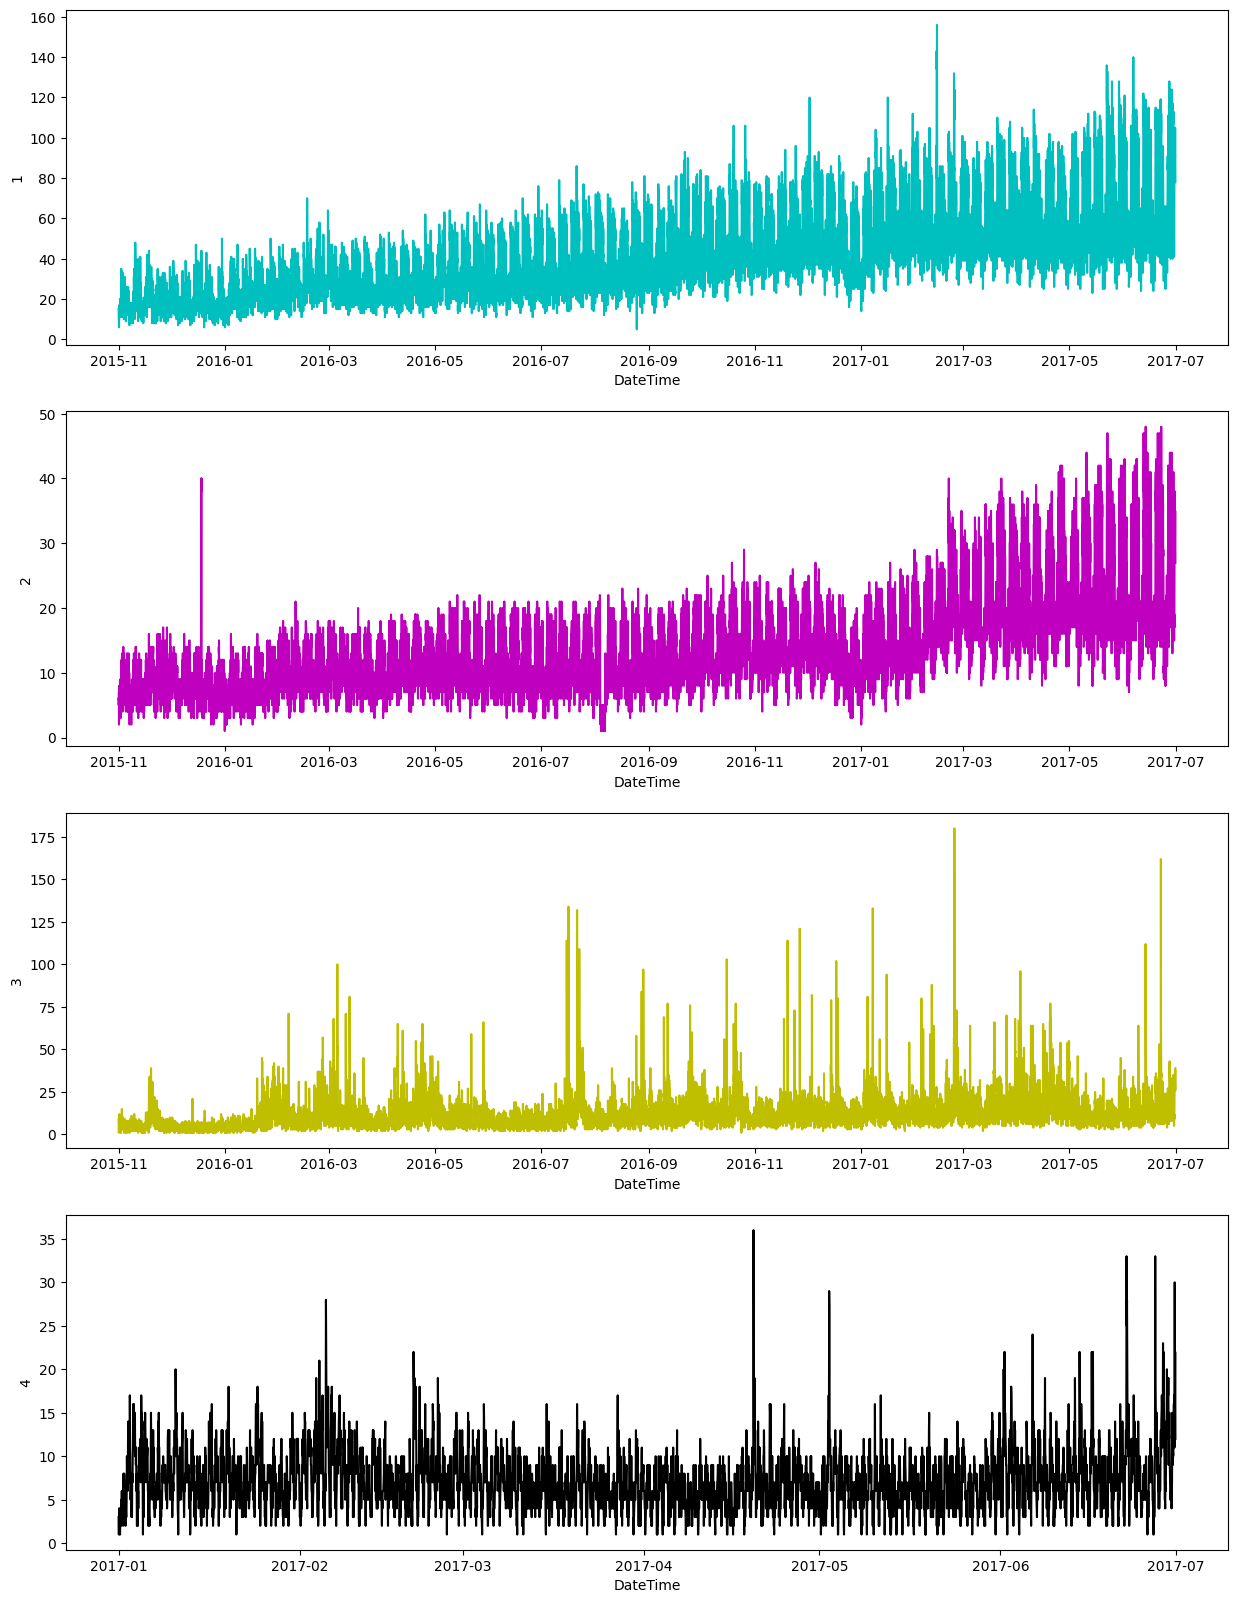

In [300]:
#timeseries plot at each junction

plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax=sns.lineplot(data=dataframe_1,color='c')

plt.subplot(4,1,2)
ax=sns.lineplot(data=dataframe_2,color='m')

plt.subplot(4,1,3)
ax=sns.lineplot(data=dataframe_3,color='y')

plt.subplot(4,1,4)
ax=sns.lineplot(data=dataframe_4,color='k')

ax=sns.lineplot()


# Model Selection and evaluation

In [46]:
#preprocess the data for model selection

train_df = pd.read_csv("train_aWnotuB.csv")
test_df = pd.read_csv("datasets_8494_11879_test_BdBKkAj.csv")
def preprocess_data(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df['Hour'] = df['DateTime'].dt.hour
    df['Day'] = df['DateTime'].dt.day
    df['Month'] = df['DateTime'].dt.month
    df['Year'] = df['DateTime'].dt.year
    df['Day of week']=df['DateTime'].dt.dayofweek
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [47]:
tmap={0:'WORKDAY',1:'WORKDAY',2:'WORKDAY',3:'WORKDAY',4:'WORKDAY',5:'HOLIDAY',6:'HOLIDAY'}
train_df['W/H']=train_df['Day of week'].map(tmap)
test_df['W/H']=test_df['Day of week'].map(tmap)

wmap={'WORKDAY':1,'HOLIDAY':0}
train_df['W/H']=train_df['W/H'].map(wmap)
test_df['W/H']=test_df['W/H'].map(wmap)

# Linear Regression Model

In [301]:
#Using Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

def train_and_predict(train_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]

    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year','Day of week','W/H']

    # Create the target variable (number of vehicles)
    target = 'Vehicles'

    # Split the train data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=0)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate accuracy metrics
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = mean_squared_error(y_val, val_predictions, squared=False)

    return mae, rmse

# Calculate accuracy for each junction
junctions = [1, 2, 3, 4]
accuracy_metrics = []

for junction in junctions:
    mae, rmse = train_and_predict(train_df, junction)

    accuracy = {
        'Junction': junction,
        'MAE': mae,
        'RMSE': rmse
    }
    accuracy_metrics.append(accuracy)


In [302]:
# Print accuracy metrics for Linear Regression
for accuracy in accuracy_metrics:
    print("Junction:", accuracy['Junction'])
    print("MAE:", accuracy['MAE'])
    print("RMSE:", accuracy['RMSE'])
    print()


Junction: 1
MAE: 9.475002580485857
RMSE: 12.09939099947197

Junction: 2
MAE: 3.367256282161323
RMSE: 4.430184915879733

Junction: 3
MAE: 5.629009482253869
RMSE: 8.749302530348356

Junction: 4
MAE: 2.3576551360401847
RMSE: 3.2634036132930206



accuracy metrics are large for Linear Regression model

# Logistic Regression Model 

In [415]:
#Using Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression

def train_and_predict(train_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]

    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year','Day of week','W/H']
    # Create the target variable (number of vehicles)
    target = 'Vehicles'

    # Split the train data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=0)

    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate accuracy metrics
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = mean_squared_error(y_val, val_predictions, squared=False)

    return mae, rmse

# Calculate accuracy for each junction
junctions = [1, 2, 3, 4]
accuracy_metrics = []

for junction in junctions:
    mae, rmse = train_and_predict(train_df, junction)

    accuracy = {
        'Junction': junction,
        'MAE': mae,
        'RMSE': rmse
    }
    accuracy_metrics.append(accuracy)


In [416]:
# Print accuracy metrics
for accuracy in accuracy_metrics:
    print("Junction:", accuracy['Junction'])
    print("MAE:", accuracy['MAE'])
    print("RMSE:", accuracy['RMSE'])
    print()


Junction: 1
MAE: 19.69304556354916
RMSE: 26.183150739842148

Junction: 2
MAE: 5.53100376841384
RMSE: 7.879031456381392

Junction: 3
MAE: 6.592668722165125
RMSE: 10.515099503785583

Junction: 4
MAE: 2.4016110471806673
RMSE: 3.46027929455378



accuracy metrics are relatively large for Logistic Regression

# Random Forest Classifier

In [359]:
dataframe_4.dropna(inplace=True)

In [360]:
#ADFULLERS TEST

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(dataframe_1.values)
print('p-value: %f' % result[1])
result = adfuller(dataframe_2.values)
print('p-value: %f' % result[1])
result = adfuller(dataframe_3.values)
print('p-value: %f' % result[1])
result = adfuller(dataframe_4.values)
print('p-value: %f' % result[1])

p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000


Since the p-value is below 0.05, the data can be assumed to be stationary

In [306]:
#Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def train_and_predict(train_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]

    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year', 'Day of week', 'W/H']

    # Create the target variable (number of vehicles)
    target = 'Vehicles'

    # Split the train data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[target], test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate accuracy metrics
    mae = mean_absolute_error(y_val, val_predictions)
    rmse = mean_squared_error(y_val, val_predictions, squared=False)

    return mae, rmse

# Calculate accuracy for each junction
junctions = [1, 2, 3, 4]
accuracy_metrics = []

for junction in junctions:
    mae, rmse = train_and_predict(train_df, junction)

    accuracy = {
        'Junction': junction,
        'MAE': mae,
        'RMSE': rmse
    }
    accuracy_metrics.append(accuracy)

# Print accuracy metrics
for accuracy in accuracy_metrics:
    print("Junction:", accuracy['Junction'])
    print("MAE:", accuracy['MAE'])
    print("RMSE:", accuracy['RMSE'])
    print()


Junction: 1
MAE: 2.852182254196643
RMSE: 3.977159489122666

Junction: 2
MAE: 1.7779239465570402
RMSE: 2.248420038320724

Junction: 3
MAE: 2.928283658787256
RMSE: 5.565888558936187

Junction: 4
MAE: 1.8990678941311852
RMSE: 2.6096021018604585



 RFG has a pretty good accuracy 

In [407]:


def train_and_predict(train_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]

    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year', 'Day of week', 'W/H']

    # Create the target variable (number of vehicles)
    target = 'Vehicles'

    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_data[features], train_data[target])

    # Predict using the trained model on training data
    y_train_pred = model.predict(train_data[features])

    # Plot the predicted values and original values for training data
    plt.plot(train_data[target], label='Original (Training)')
    plt.plot(y_train_pred, label='Predicted (Training)')
    plt.ylabel('Number of Vehicles')
    plt.title('Predicted vs. Original (Training Data)')
    plt.legend()
    plt.show()

    # Calculate accuracy metrics for training data
    mae_train = mean_absolute_error(train_data[target], y_train_pred)
    rmse_train = mean_squared_error(train_data[target], y_train_pred, squared=False)
    
    # ...

    return mae_train, rmse_train


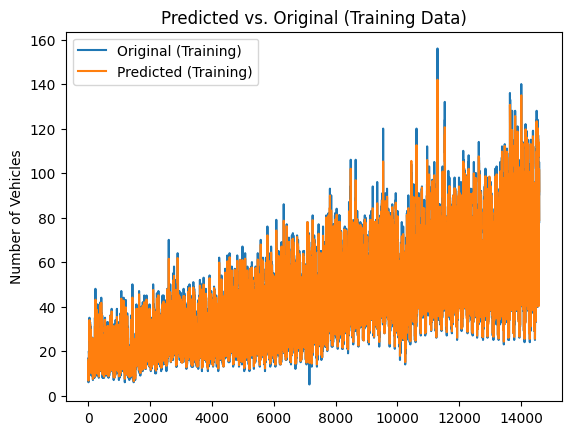

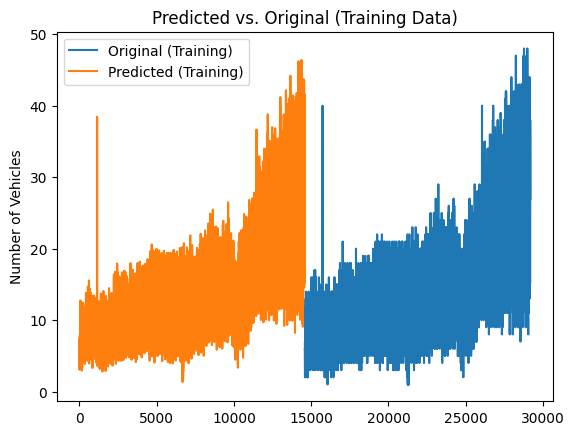

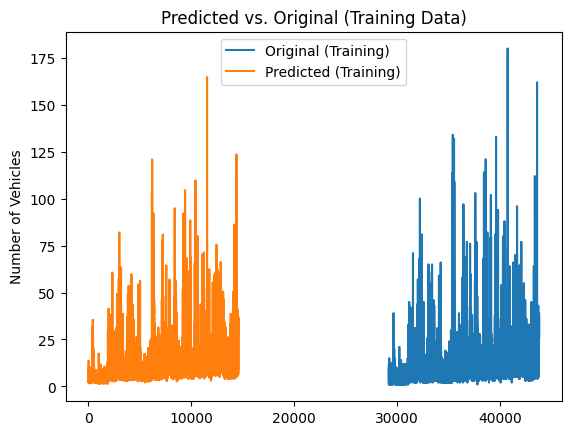

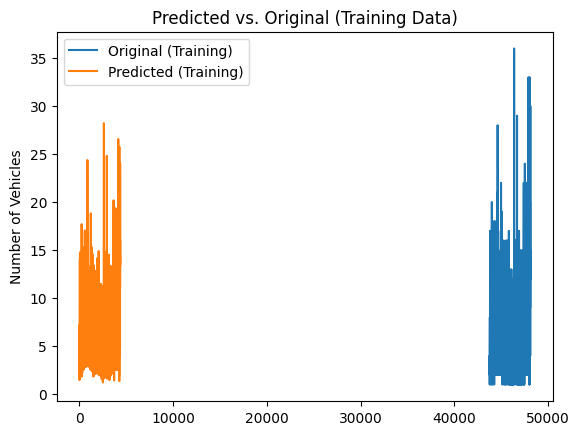

In [408]:
# Calculate accuracy for each junction
junctions = [1, 2, 3, 4]
accuracy_metrics = []

for junction in junctions:
    mae, rmse = train_and_predict(train_df, junction)

    accuracy = {
        'Junction': junction,
        'MAE': mae,
        'RMSE': rmse
    }
    accuracy_metrics.append(accuracy)

In [365]:
def train_and_predict(train_df, test_df, junction):
    # Filter data for the specified junction
    train_data = train_df[train_df['Junction'] == junction]
    
    # Select the features for training
    features = ['Hour', 'Day', 'Month', 'Year', 'Day of week', 'W/H']
    
    # Create the target variable (number of vehicles)
    target = 'Vehicles'
    
    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_data[features], train_data[target])
    
    # Make predictions for the test dataset
    test_data = test_df[test_df['Junction'] == junction]
    test_data['Predicted_Vehicles'] = model.predict(test_data[features])
    
    return test_data[['DateTime', 'Junction', 'Predicted_Vehicles']]

# Predict vehicles for each junction
junctions = [1, 2, 3, 4]
predictions = pd.DataFrame()

for junction in junctions:
    junction_predictions = train_and_predict(train_df, test_df, junction)
    predictions = pd.concat([predictions, junction_predictions])

# Save predictions to a new CSV file
predictions.to_csv('traffic_predictions_rscp.csv', index=False)

In [409]:
p=pd.read_csv('traffic_predictions_rscp.csv')
p['DateTime'] = pd.to_datetime(p['DateTime'])

In [410]:
pdf = p.pivot(columns="Junction", index="DateTime",values='Predicted_Vehicles')  

In [411]:
pred_dataframe_1 = pdf[1]
pred_dataframe_2 = pdf[2]  
pred_dataframe_3 = pdf[3]  
pred_dataframe_4 = pdf[4] 

Text(0.5, 0, 'Date')

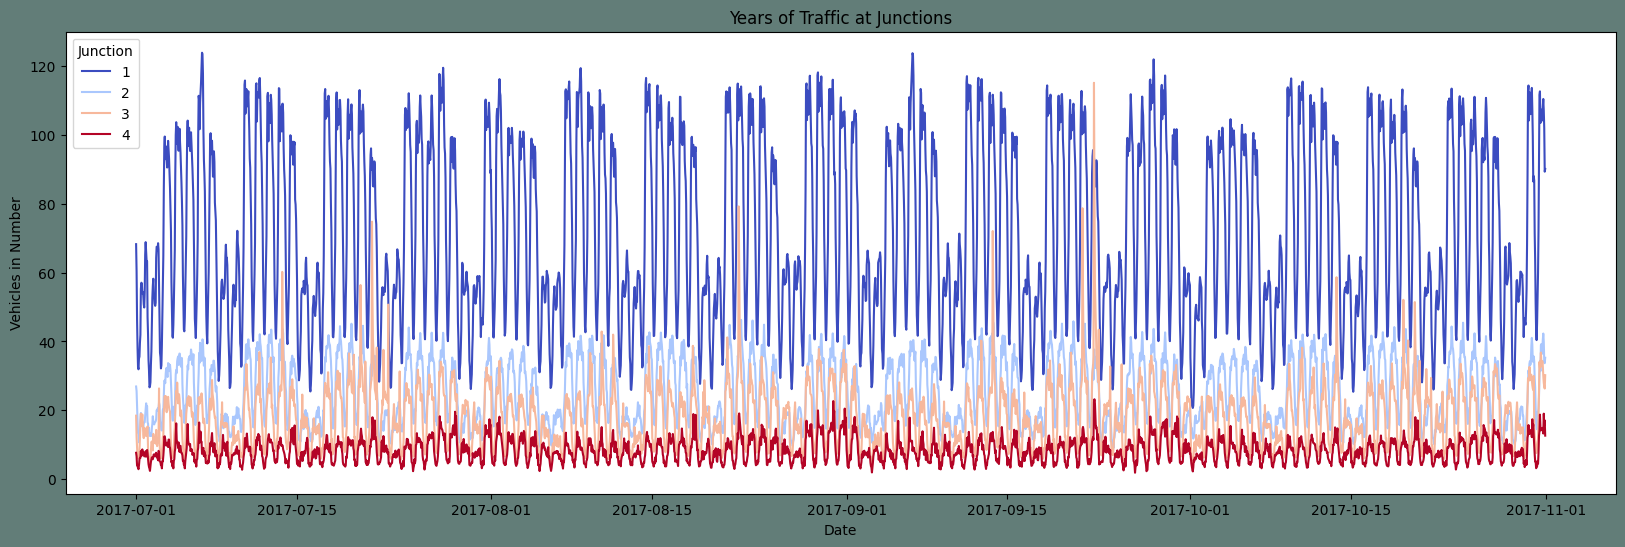

In [412]:
#timeseries plot of data
plt.figure(figsize=(20,6),facecolor="#627D78")  
Time_series=sns.lineplot(x='DateTime',y="Predicted_Vehicles",data=p, hue="Junction", palette='coolwarm')  
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date")  

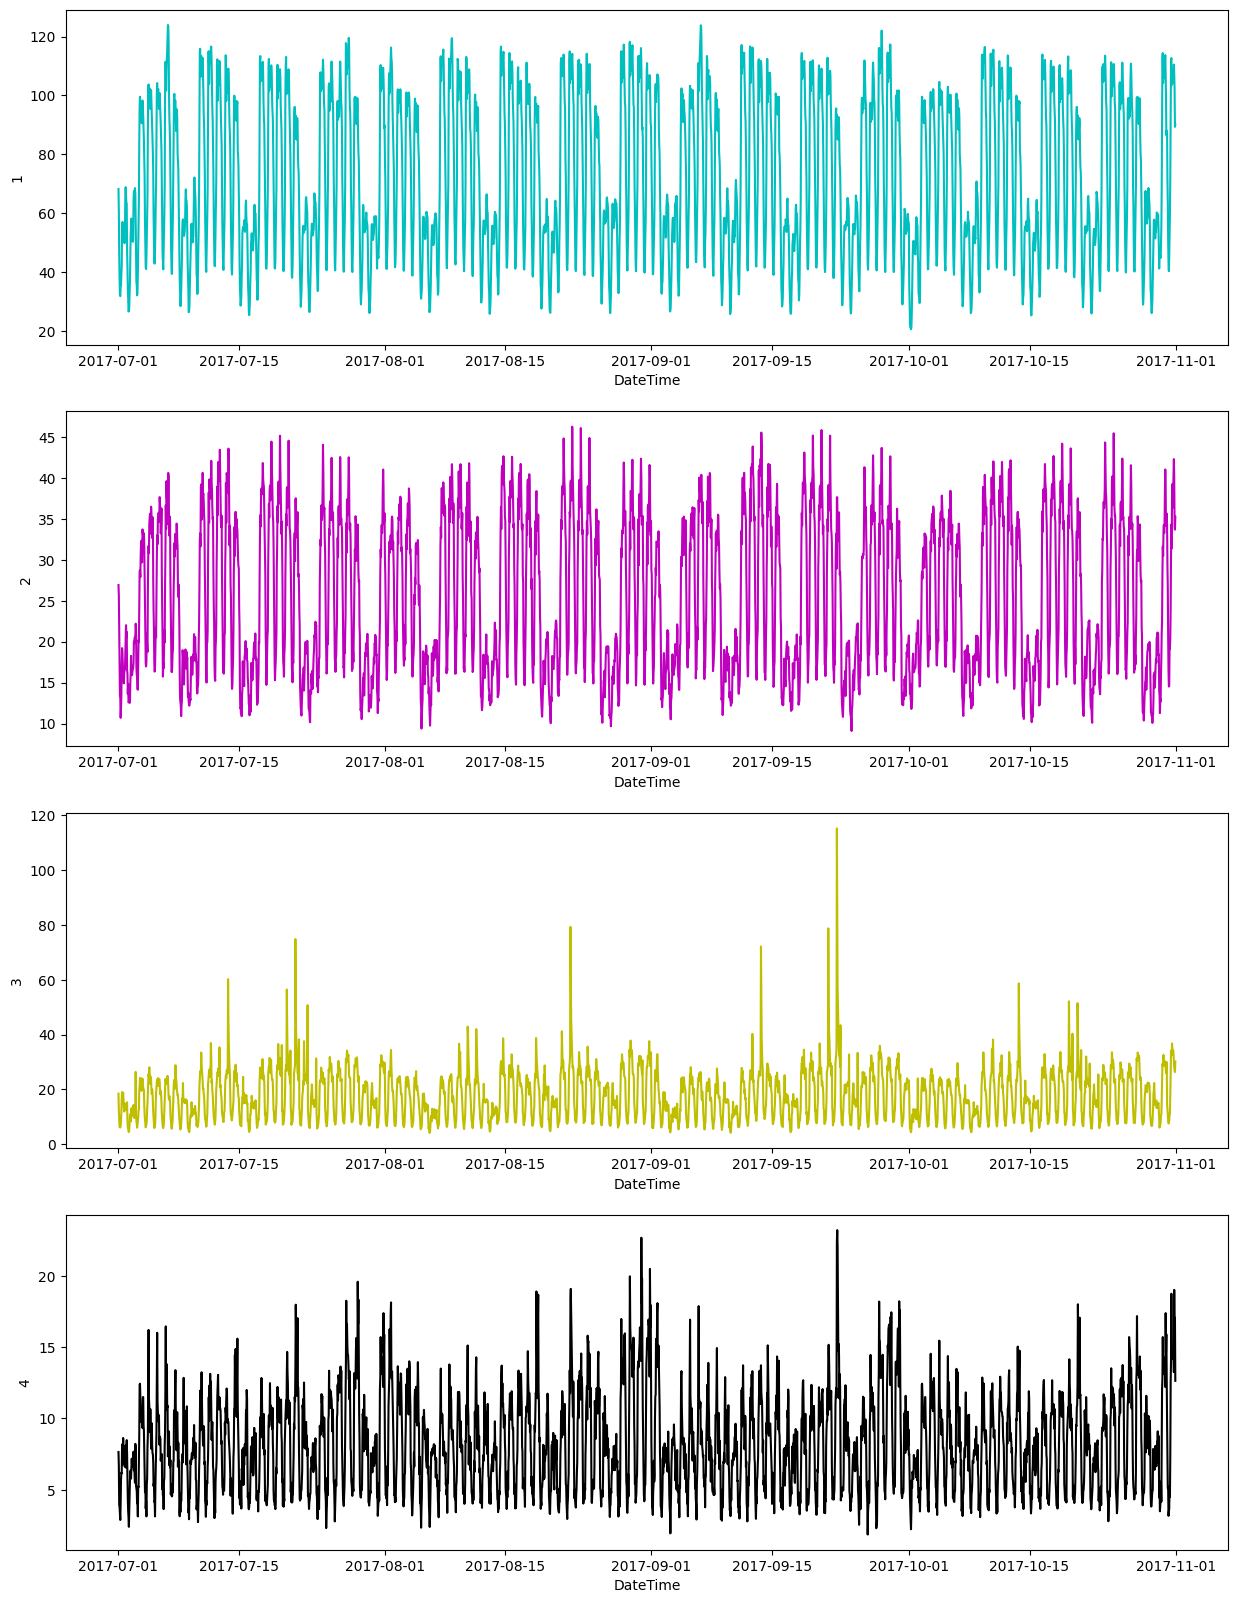

In [413]:

plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax=sns.lineplot(data=pred_dataframe_1,color='c')

plt.subplot(4,1,2)
ax=sns.lineplot(data=pred_dataframe_2,color='m')

plt.subplot(4,1,3)
ax=sns.lineplot(data=pred_dataframe_3,color='y')

plt.subplot(4,1,4)
ax=sns.lineplot(data=pred_dataframe_4,color='k')

ax=sns.lineplot()

"To achieve improved results, the evaluation of feature-target relationships in the dataset was conducted. Furthermore, a time series forecasting approach was implemented to enhance the accuracy of predictions.